In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-02-13 06:16:39.933759: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 06:16:39.934591: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 06:16:39.939827: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 06:16:39.950706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739427399.964644   25342 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739427399.96

In [2]:
# Load dataset
df = pd.read_csv("car_emissions_dataset.csv")  # Replace with actual file

# Encode 'Size' column
size_encoder = LabelEncoder()
df['Size of Vehicle'] = size_encoder.fit_transform(df['Size of Vehicle'])  # Small=0, Medium=1, Large=2

# Encode 'Flag' column (target variable)
flag_encoder = LabelEncoder()
df['Flag'] = flag_encoder.fit_transform(df['Flag'])  # Low=0, Medium=1, High=2

# Select features and labels
features = ['Size of Vehicle', 'CO2 Emission (g/km)', 'NOx Emission (g/km)', 'PM2.5 Emission (g/km)', 'CO Emission (g/km)']
X = df[features].values
y = df['Flag'].values

# Normalize emissions (CO2, NOx, PM2.5, CO)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100


/root/hackathon-projects/pollution-flag/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1739427409.797998   25342 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3694 - loss: 1.0888 - val_accuracy: 0.7000 - val_loss: 0.8347 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 0.7930 - val_accuracy: 0.8000 - val_loss: 0.6461 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.6365 - val_accuracy: 0.8600 - val_loss: 0.5170 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.4286 - val_accuracy: 0.8600 - val_loss: 0.4249 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9156 - loss: 0.3738 - val_accuracy: 0.8900 - val_loss: 0.3663 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.3272 - val_accuracy: 0.9100 - val_loss: 0.3285 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.2797 - val_accuracy: 0.920

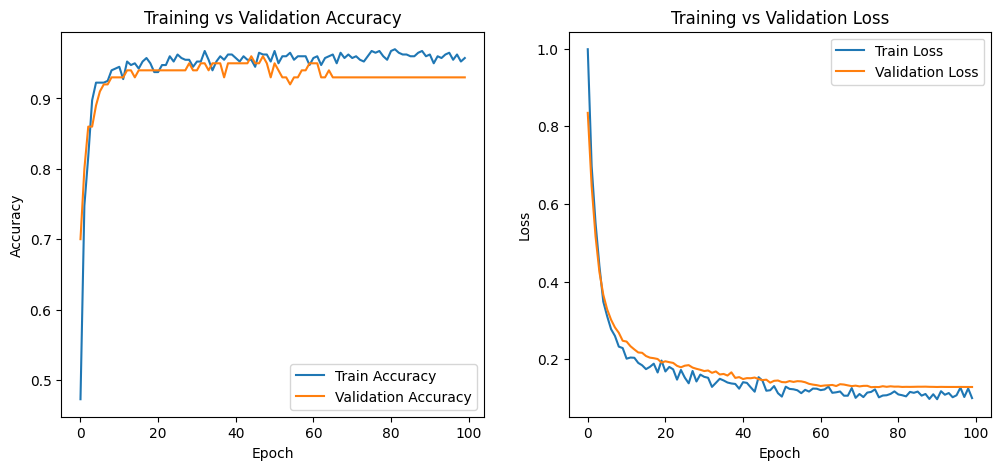

In [3]:

# Define the model
model = keras.Sequential([
     keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),  
    keras.layers.Dropout(0.2),  # Drop 20% neurons randomly to reduce overfitting
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),  
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_schedule])


# Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()
# Save the trained model
model.save("car_pollution_model.keras")


In [7]:
# Load the trained model
model = keras.models.load_model("car_pollution_model.keras")

# Example new data: Car size, CO2, NOx, PM2.5, CO emission
new_car = np.array([[0, 5.9,0.084,0.0104,0.59]])  # 1 = Medium size
new_car[:, 1:] = scaler.transform(new_car[:, 1:])  # Apply same normalization

# Predict
prediction = model.predict(new_car)
predicted_class = np.argmax(prediction)

# Convert numeric label back to category
print("Predicted Pollution Level:", flag_encoder.inverse_transform([predicted_class])[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Pollution Level: Yellow


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/tmp/ipykernel_25342/2376804333.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_flags))


<Figure size 1000x600 with 0 Axes>

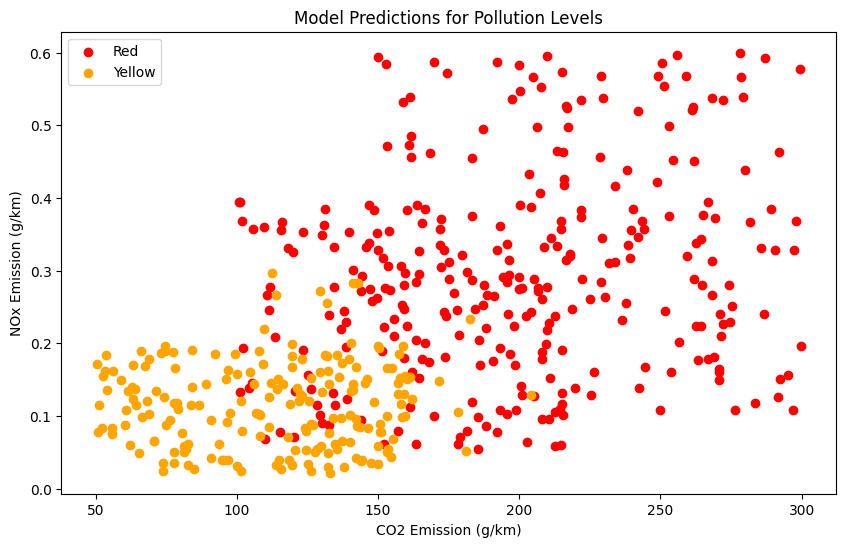

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the trained model
model = keras.models.load_model("car_pollution_model.keras")

# Load dataset
df = pd.read_csv("car_emissions_dataset.csv")

# Encode 'Size of Vehicle' column
size_encoder = LabelEncoder()
df['Size of Vehicle'] = size_encoder.fit_transform(df['Size of Vehicle'])  # Small=0, Medium=1, Large=2

# Encode 'Flag' column (target variable)
flag_encoder = LabelEncoder()
df['Flag'] = flag_encoder.fit_transform(df['Flag'])  # Low=0, Medium=1, High=2

# Select features and labels
features = ['Size of Vehicle', 'CO2 Emission (g/km)', 'NOx Emission (g/km)', 'PM2.5 Emission (g/km)', 'CO Emission (g/km)']
X = df[features].values

# Normalize emissions (CO2, NOx, PM2.5, CO)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Predict
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)

# Convert numeric labels back to categories
df["Predicted Pollution Level"] = flag_encoder.inverse_transform(predicted_classes)

# Visualize multiple predictions
plt.figure(figsize=(10, 6))
unique_flags = df["Predicted Pollution Level"].unique()
colors = plt.cm.get_cmap("tab10", len(unique_flags))

# Define custom colors for each pollution level
custom_colors = {"Red": "red", "Yellow": "orange", "Green": "green"}

plt.figure(figsize=(10, 6))

# Loop through each pollution level and apply custom colors
for flag in df["Predicted Pollution Level"].unique():
    subset = df[df["Predicted Pollution Level"] == flag]
    plt.scatter(subset["CO2 Emission (g/km)"], subset["NOx Emission (g/km)"], 
                label=flag, color=custom_colors.get(flag, "gray"))

plt.xlabel("CO2 Emission (g/km)")
plt.ylabel("NOx Emission (g/km)")
plt.title("Model Predictions for Pollution Levels")
plt.legend()
plt.show()


In [9]:
model = keras.models.load_model("car_pollution_model.keras")

# Example new data: Car size, CO2, NOx, PM2.5, CO emission
new_car = np.array([[2, 164.6,0.327,0.0628,2.31]])  # 1 = Medium size
new_car[:, 1:] = scaler.transform(new_car[:, 1:])  # Apply same normalization

# Predict
prediction = model.predict(new_car)
predicted_class = np.argmax(prediction)

# Convert numeric label back to category
print("Predicted Pollution Level:", flag_encoder.inverse_transform([predicted_class])[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Pollution Level: Red


In [ ]:
# trying out another model 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# OneHotEncode Size
encoder = OneHotEncoder(sparse_output=False)
size_encoded = encoder.fit_transform(df[['Size of Vehicle']])

# MinMax Scaling for emissions
scaler = MinMaxScaler()
emissions_scaled = scaler.fit_transform(df[['CO2 Emission (g/km)', 'NOx Emission (g/km)', 'PM2.5 Emission (g/km)', 'CO Emission (g/km)']])

# Combine features
X = np.hstack((size_encoded, emissions_scaled))


model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),  
    keras.layers.Dropout(0.2),  # Drop 20% neurons randomly to reduce overfitting
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),  
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_schedule])

model.save("second_try_car_pollution.keras")